Notebook notes: Applying the post-processing from cv2 python module to our resulting segmented masks

In [56]:
import glob
import pickle

import numpy as np

from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image 

import rasterio
import cv2
import os

In [57]:
pkl_file = '/datadrive/data/processed/segmented_masks/planet_images_il-2020_masks.p'
with open(pkl_file, 'rb') as file:
    masks = pickle.load(file)

In [58]:
images_dir = '/datadrive/data/raw/planet_images_il-2020-07'
images = glob.glob(images_dir + '/*.tif')

num of contours: 2


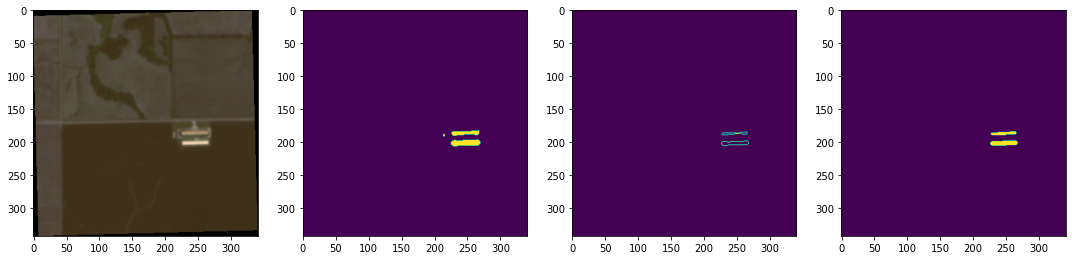

num of contours: 3


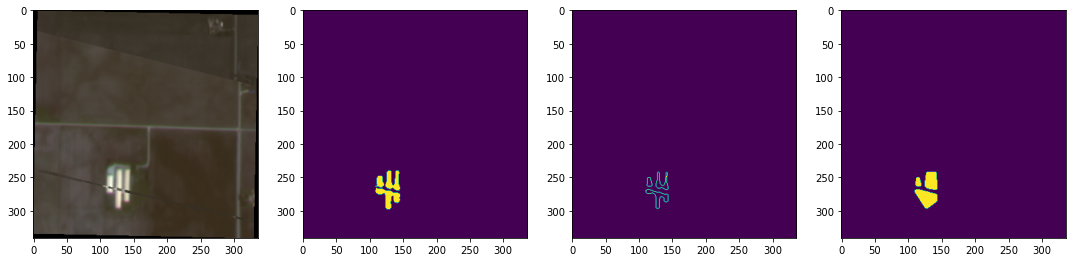

In [102]:
for i, image_path in enumerate(images):   
    if i == 30:
        break
        
    f = plt.figure()
    f.set_size_inches(18.5, 10.5)

    
    image = rasterio.open(image_path)
    r,g,b,n = image.read()
    image = np.stack((r,g,b), axis=2)
    image = image/image.max()
    
   
    ax1 = f.add_subplot(1,4,1)
    ax1 = ax1.imshow(image)
    
    image_file = os.path.splitext(os.path.basename(image_path))[0]
    mask = masks[image_file]['CAFO Shed'] 
    mask = mask*255
    
    ax2 = f.add_subplot(1,4,2)
    ax2 = ax2.imshow(mask)
    
    maskSmooth = cv2.blur(np.float32(mask), (6, 6), 1) 
    _, thres = cv2.threshold(maskSmooth, 170, 255, 0)
    contours, _ = cv2.findContours(np.uint8(thres), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    print('num of contours: ' + str(len(contours)))
    #contourImg = cv2.drawContours(np.float32(mask), contours, -1, (50), 2)
    contourImg = np.zeros(mask.shape)
    cv2.drawContours(contourImg, contours, -1, (255), 1)

    ax3 = f.add_subplot(1,4,3)
    ax3 = ax3.imshow(contourImg)
    
    hull = [cv2.convexHull(c) for c in contours]
    hullImg = np.zeros(mask.shape)
    cv2.drawContours(hullImg, hull, -1, (255), -1)
    cv2.drawContours

    ax4 = f.add_subplot(1,4,4)
    ax4 = ax4.imshow(hullImg)

    plt.show()